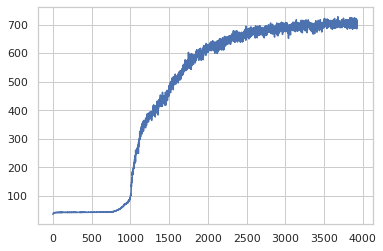

        Unnamed: 0        msteps       bestfit      bestgfit       avgfit  \
count  3920.000000   3920.000000  3.920000e+03  3.920000e+03  3920.000000   
mean   1963.947194   3479.922704 -8.846938e+08 -8.846932e+07   461.175365   
std    1134.815708   3212.628316  3.194320e+08  3.194335e+07   266.649510   
min       0.000000      0.000000 -1.000000e+09 -1.000000e+08    35.800000   
25%     980.750000    257.750000 -1.000000e+09 -1.000000e+08    84.762500   
50%    1965.500000   2673.000000 -1.000000e+09 -1.000000e+08   610.115000   
75%    2946.250000   6232.000000 -1.000000e+09 -1.000000e+08   685.212500   
max    3928.000000  10003.000000  1.000000e+03  7.383900e+02   727.400000   

               gen  
count  3920.000000  
mean   1964.947194  
std    1134.815708  
min       1.000000  
25%     981.750000  
50%    1966.500000  
75%    2947.250000  
max    3929.000000  
       Unnamed: 0     bestsol    bestgsol
count  541.000000  541.000000  541.000000
mean   270.000000   -0.036114   -

In [1]:
from graph_utils import *
from specialist_data import transformed, stats

df = transformed.data
stats.fitness_evolution()
print(stats.run_data.describe())
print(stats.metrics_data.describe())
